Reference:
https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns

## Data loading

In [7]:
DF= pd.read_csv("../Data_v4_AllNaNsReplaced_dummies.csv")
DF.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,HouseStyle,OverallQual,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,2,0,4,4,2.0,7,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,2,0,4,4,1.0,6,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,2,0,3,4,2.0,7,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,2,0,3,4,2.0,7,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,2,0,3,4,2.0,8,...,0,0,0,1,0,0,0,0,1,0


In [14]:
DF.shape

(1460, 81)

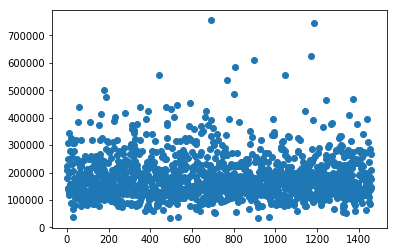

In [8]:
plt.scatter(DF.Id,DF.SalePrice)
plt.show()

## Data preprocessing

In [9]:
# Importing the dataset
dataset = DF.copy()

# X is the predictor variable
X = DF.iloc[:, 0:80].values

# y is the response variable
y = DF.SalePrice.values

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
import lightgbm as lgb

d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mse'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [11]:
#Prediction
y_pred=clf.predict(x_test)
y_pred

array([ 186581.30349092,  170129.23468291,  164392.92165457,
        185948.62806226,  160494.61471585,  159324.77941643,
        208544.04812968,  168368.69705496,  236031.4075619 ,
        176532.56177267,  186026.91693719,  170750.17505912,
        193984.96161745,  165820.45054275,  166344.81219255,
        170268.15375265,  188472.99201696,  165878.25614028,
        172107.90374416,  180354.69913339,  171994.4218665 ,
        172558.85520848,  164648.87397371,  177350.24980279,
        183548.54350333,  184201.62290683,  178303.46999295,
        156537.94743566,  215072.94183462,  164528.4477763 ,
        168932.5139064 ,  185131.96073834,  173553.86517666,
        205291.3064427 ,  234536.06134071,  179247.11889283,
        205285.03468663,  165887.49559528,  198058.7768896 ,
        210328.81898039,  191466.2082665 ,  168937.12642919,
        179517.75617186,  216316.45446976,  228971.57210984,
        167771.29467379,  166581.37104202,  166631.32414237,
        177443.95480257,

In [12]:
mse = np.mean((y_test-y_pred)**2)
mse

4154208395.2175655

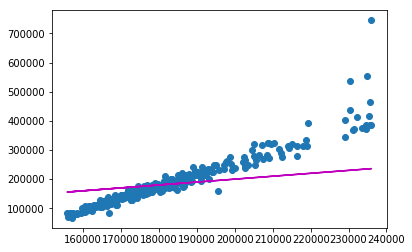

In [13]:
plt.scatter(y_pred,y_test)
plt.plot(y_pred,y_pred,"m")
plt.show()

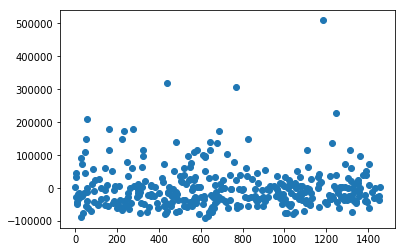

In [14]:
plt.scatter(x_test[:,0],y_test-y_pred)
plt.show()

In [15]:
MSEs = {}
Mse_last = mse
for lr in np.linspace(0.01,1,100):
    params['learning_rate'] = lr
    clf = lgb.train(params, d_train, 100)
    y_pred=clf.predict(x_test)
    Mse = np.mean((y_pred-y_test)**2)
    if Mse > Mse_last:
        break
    MSEs.update({"learning_rate = " + str(round(lr,3)) : Mse})
    Mse_last = Mse

In [16]:
MSEs

{'learning_rate = 0.01': 1647220833.6165366,
 'learning_rate = 0.02': 744007453.12874842,
 'learning_rate = 0.03': 549955048.51779366,
 'learning_rate = 0.04': 494150200.71383774,
 'learning_rate = 0.05': 475292544.4865554,
 'learning_rate = 0.06': 464274207.578511,
 'learning_rate = 0.07': 456106286.11188281,
 'learning_rate = 0.08': 443644095.87746894,
 'learning_rate = 0.09': 430485841.96237725,
 'learning_rate = 0.1': 424734251.78986317,
 'learning_rate = 0.11': 423511483.03931099,
 'learning_rate = 0.12': 408802954.98400795,
 'learning_rate = 0.13': 389058794.90696496}

In [17]:
MSEs = {}
Mse_last = mse
for lr in np.linspace(0.12,0.14,21):
    params['learning_rate'] = lr
    clf = lgb.train(params, d_train, 100)
    y_pred=clf.predict(x_test)
    Mse = np.mean((y_pred-y_test)**2)
    if Mse > Mse_last:
        break
    MSEs.update({"learning_rate = " + str(round(lr,3)) : Mse})
    Mse_last = Mse

In [18]:
MSEs

{'learning_rate = 0.12': 408802954.98400795,
 'learning_rate = 0.121': 408777139.01381719,
 'learning_rate = 0.122': 404170825.89095861,
 'learning_rate = 0.123': 402731628.78580171,
 'learning_rate = 0.124': 393056545.44970697}

In [19]:
params['learning_rate'] = 0.124
clf = lgb.train(params, d_train, 100)
y_pred=clf.predict(x_test)
Mse = np.mean((y_pred-y_test)**2)

In [20]:
(mse-Mse)/Mse  # new LR is 9.5x better than the original

9.5689841406014988

In [25]:
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.0001
params['boosting_type'] = 'goss'
params['objective'] = 'regression'
params['metric'] = 'mse'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [35]:
#Prediction
y_pred=clf.predict(x_test)
mse = np.mean((y_test-y_pred)**2)
mse

1.8987411384505149e+20

In [42]:
MSEs = {}
Mse_last = mse
for lr in np.linspace(0.001,0.1,100):
    params['learning_rate'] = lr
    clf = lgb.train(params, d_train, 100)
    y_pred=clf.predict(x_test)
    Mse = np.mean((y_pred-y_test)**2)
    if Mse > Mse_last:
        break
    MSEs.update({"learning_rate = " + str(round(lr,4)) : Mse})
    Mse_last = Mse.copy()

In [43]:
MSEs

{'learning_rate = 0.001': 5637815323.4257479,
 'learning_rate = 0.002': 4830019070.6664124,
 'learning_rate = 0.003': 4154208395.2175655,
 'learning_rate = 0.004': 3587676621.653161,
 'learning_rate = 0.005': 3113298001.0187941,
 'learning_rate = 0.006': 2714592722.3928809,
 'learning_rate = 0.007': 2379171078.3499951,
 'learning_rate = 0.008': 2092539088.0748153,
 'learning_rate = 0.009': 1852013772.1451907,
 'learning_rate = 0.01': 1647220833.6165366,
 'learning_rate = 0.011': 1378367105.2711682}

In [48]:
params['boosting_type'] = 'dart'
MSEs = {}
Mse_last = mse
for lr in np.linspace(0.01,1,100):
    params['learning_rate'] = lr
    clf = lgb.train(params, d_train, 100)
    y_pred=clf.predict(x_test)
    Mse = np.mean((y_pred-y_test)**2)
    if Mse > Mse_last:
        break
    MSEs.update({"learning_rate = " + str(round(lr,4)) : Mse})
    Mse_last = Mse.copy()

In [49]:
MSEs

{'learning_rate = 0.01': 8166795039.3741226,
 'learning_rate = 0.02': 5425671353.9183168,
 'learning_rate = 0.03': 3817227576.1570444,
 'learning_rate = 0.04': 2826950839.7252741,
 'learning_rate = 0.05': 2186241273.7515783,
 'learning_rate = 0.06': 1742061678.1769781,
 'learning_rate = 0.07': 1437860657.0924449,
 'learning_rate = 0.08': 1225448773.4303916,
 'learning_rate = 0.09': 1063494936.8399695,
 'learning_rate = 0.1': 942025322.33247042,
 'learning_rate = 0.11': 846215002.41309166,
 'learning_rate = 0.12': 773426978.45953155,
 'learning_rate = 0.13': 720025627.56821287,
 'learning_rate = 0.14': 652521779.22850287,
 'learning_rate = 0.15': 623589967.39026701,
 'learning_rate = 0.16': 584634914.45855057,
 'learning_rate = 0.17': 561403913.41172075,
 'learning_rate = 0.18': 531676612.56872302,
 'learning_rate = 0.19': 519349082.96085984,
 'learning_rate = 0.2': 499807573.25827813,
 'learning_rate = 0.21': 484606071.10692877,
 'learning_rate = 0.22': 463333253.95818239,
 'learning_r